# Blog Post 4: The Titanic Dataset and Kaggle's Intro To Machine Learning Course 

    This week my objective was to understand the titanic dataset through visualizations, learn what random forest classifiers are and to finish Kaggle's Intro to Machine Learning course and be able to explain what I learned from it. Kaggle says that the course lasts three hours. I find that for myself the online coding courses take me almost double the time to finish than are quoted. Nonetheless, I went into it, determined to finish the course in the 2nd half of my 20 hour block. 


    The first thing, you as a data analyst or doing any other profession for that matter, need to do is understand for yourself what something is before trying to explain that to other people. This may not be the ideal first step but I thought that I should explore mathplotlib and seaborn for different data visualization. My goal was to create 20 different plots/graphs and pick the five that were the most useful.

    Before I begin plotting, I should know what kind of information my dataset provides me with before I begin to comprehend it. There are many different types of variables. For example there are:

- Categorical: Variables that can be divided into multiple categories but have no priority between them. In our case 'Embarked' (C = Cherbourg; Q = Queenstown; S = Southampton the port from which the passenger got on the Titanic). None of the variables have any inherent value.

- Binary: A variable that only has two values. In our case 'Sex' (Male/Female) is a categorical binary variable. 'Survived' is technically a categorical binary variable but we've represented it as an integer.

- Ordinal: A variable similar to categorical variables, but can however be ordered. 'Pclass' has been entered as an integer for simplicity of data analysis.

- Continuous: Variables that can take any value in between the minimum and maximum value of the values of the variable. 'Age' and 'Fare' represent our continuous variables.

- Count: Variables that represent a count of a variable. In our case: SibSp, Parch which represent Siblings/Spouses and Parents/Children respectively.

- Useless: Then we have variables that will not aid us in analyzing the data except to identify unique passengers. These variables include 'PassengerID' , 'Name' , 'Cabin' and 'Ticket'.

To be honest I was tempted to get rid of at least 'Ticket' and 'Fare' altogether because I didn't really see how this would help my analysis. 'Cabin' could have been potentially helpful if there weren't so many NaN values. Thinking about it, if you were in the hull of the ship, it would stand to reason you wouldn't have as high a chance of survival as someone whose room was higher on the ship if only for two or three people that got trapped towards the bottom of the ship. So after creating over 20 visualizations I've selected some of the most helpful with some variety to lead to some interesting insights. 

So, to get started I needed to load the relevant packages. Even though I used all seaborn plots. I wanted to be sure to have matplotlib just in case. Of course I read the Titanic dataset in as a Pandas dataframe.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.io import arff
data_train = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\\titanic (1)\\train.csv', encoding = 'utf8')
data_test = pd.read_csv('C:\\Users\\wally\\OneDrive\\Documents\\Python Scripts\\Titanic Competition\\titanic (1)\\test.csv', encoding = 'utf8')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It's a good idea to seea what kind of variables we are dealing with as well as how many NaN values we have to
work with. Having looked at this dataset before, I already knew there were NaN values for 'Age', 'Cabin' and
'Embarked'. I'm not going to worry about the NaN values for 'Cabin' or 'Embarked' because we won't really
use 'Cabin' in our analysis and we are only missing two values for 'Embarked' in which we only use one
or two visualizations for what I would call "superficial" purposes. Dealing with the age problem is something
I will deal with later and may have to redo some of my visualizations for. Seaborn was great for visualizing
a lot of different types of data and making some great insights.

Below I used a catplot to demonstrate our number of survivors and from which gender they came from. As we can see
from the data, way more men were onboard than women. However, despite the difference in number of males and females,
almost 2:1, more females survived than did males. About 18.9% of males survived where as 74.2% of women survived. So we can infer that you had a more likely chance of survival if you were female. The code and the frequency plot below reflect those statistics.

In [31]:
men_df = data_train.loc[data_train.Sex == 'male']
men_survived_df = men_df.loc[men_df.Survived == 1]
rate_men = (len(men_survived_df)/len(men_df))* 100
print("% of men who survived:", rate_men)

% of men who survived: 18.890814558058924


In [32]:
women_df = data_train.loc[data_train.Sex == 'female']
women_survived_df = women_df.loc[women_df.Survived == 1]
rate_women = (len(women_survived_df)/len(women_df))* 100
print("% of women who survived:", rate_women)

% of women who survived: 74.20382165605095


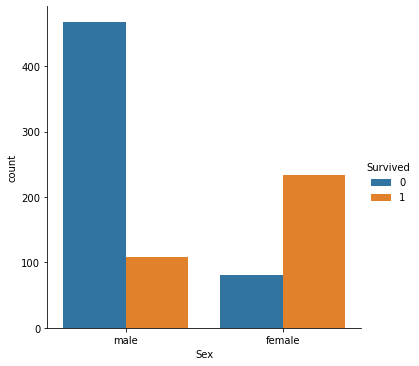

In [33]:
sns.catplot(x = 'Sex', kind = 'count', data = data_train, hue = 'Survived')

Another metric that was very interesting to look at was the frequency of people that were in first, second and third class. As we can see there were much more people in third class. There were more third class passengers than the other two passengers classes combined.

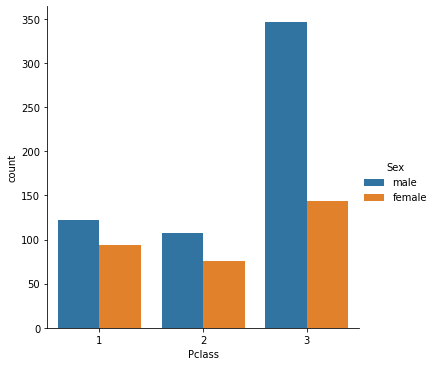

In [34]:
sns.catplot(x = 'Pclass', data = data_train, hue = 'Sex', kind = 'count')

As we can see in the chart below, it can be interpreted that what class you were in, greatly determined your chance at survival. For example, first class passengers were the only passenger class group whose survival rate was above 50%. As we'll see with exact numbers in the heat map below this chart, the lower your class, the lower your survival rate.

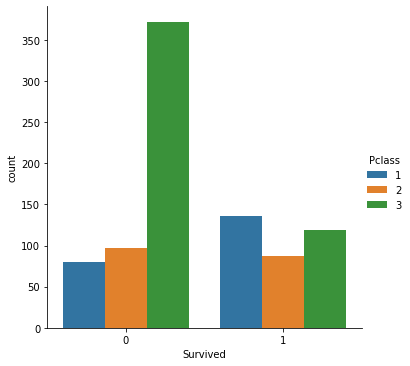

In [35]:
sns.catplot(x = 'Survived', data = data_train, kind = 'count', hue = 'Pclass')

Below is a heat map of counts of passengers in certain classes and the associated count of survivors and non-survivors in each class. I thought it was interesting that the second class passengers made up the smallest amount of survivors. After quick addition, it can be inferred that this is largely to do with the fact that it is the smallest group of passengers.

% of first class passengers who survived 62.96296296296296
% of second class passengers who survived 47.28260869565217
% of third class passengers who survived 24.236252545824847


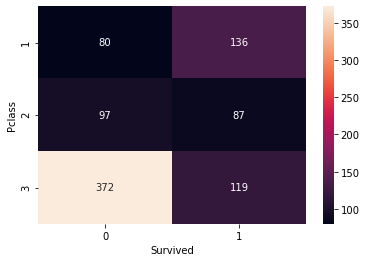

In [36]:
group = data_train.groupby(['Pclass' , 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt = "d")
surv_1st = (136/216)*100
surv_2nd = (87/184)*100
surv_3rd = (119/491)*100
print('% of first class passengers who survived', surv_1st)
print('% of second class passengers who survived', surv_2nd)
print('% of third class passengers who survived', surv_3rd)

I thought it might be interesting to make put another column into our dataset that differentiated between children. Our dataset doesn't explicitly say at what age someone is considered a child but I thought 16 was a good age. I wrote a function that would determine which of our passenger was a child and label them either as 'male', 'female', or 'child'. As you can see
the column is now added to our data.

In [37]:
def titan_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else: return sex
data_train['person'] = data_train[['Age','Sex']].apply(titan_child, axis = 1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  person       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


Then using this data to make another frequency chart, we can see that there were not many children on board. There were 83 to be exact and their survival rate was not higher than first class passengers. This is probably due to the fact that the majority of children were third class passengers. Just because I was curious, I found that there were 6 passengers under the age of 16 in first class and all but one survived. Contrastly, the survival rate of children in third class was 43.1%. This seems to answer the question of what is more important in regards of survival; being a child or being in first class? It seems that it was clearly more important to be in first class.

In [38]:
children_df = data_train.loc[data_train.Age < 16]
children_survived_df = children_df.loc[children_df.Survived == 1]
rate_children_survived = (len(children_survived_df)/len(children_df))*100
print("Number of children on board:", len(children_df))
print("% of children who survived:", rate_children_survived)

Number of children on board: 83
% of children who survived: 59.036144578313255


In [39]:
first_class_chilrden_df = children_df.loc[children_df.Pclass == 1]
first_class_children_survived_df = children_survived_df.loc[children_survived_df.Pclass == 1]
rate_first_class_children_survived = (len(first_class_children_survived_df)/len(first_class_chilrden_df))*100
print(len(first_class_chilrden_df))
print(len(first_class_children_survived_df))
print("% of first class children who survived:", rate_first_class_children_survived)

6
5
% of first class children who survived: 83.33333333333334


In [40]:
third_class_chilrden_df = children_df.loc[children_df.Pclass == 3]
third_class_children_survived_df = children_survived_df.loc[children_survived_df.Pclass == 3]
rate_third_class_children_survived = (len(third_class_children_survived_df)/len(third_class_chilrden_df))*100
print(len(third_class_chilrden_df))
print(len(third_class_children_survived_df))
print("% of third class children who survived:", rate_third_class_children_survived)

58
25
% of third class children who survived: 43.103448275862064


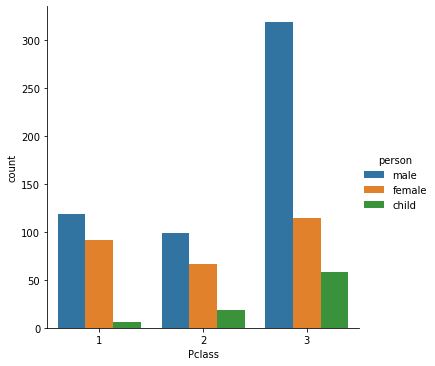

In [41]:
sns.catplot(x = 'Pclass', data = data_train, hue = 'person', kind = 'count')

I saw a kdeplot and thought it would be a good idea to try it out. The kdeplot below is a chart of three distribution charts showing the density of the three passenger classes. It makes sense that the third class passengers would be the youngest on average and the higher your class, the older you would be. If you're older you've had more time to accumulate wealth and would therefore be able to afford a more expensive ticket.

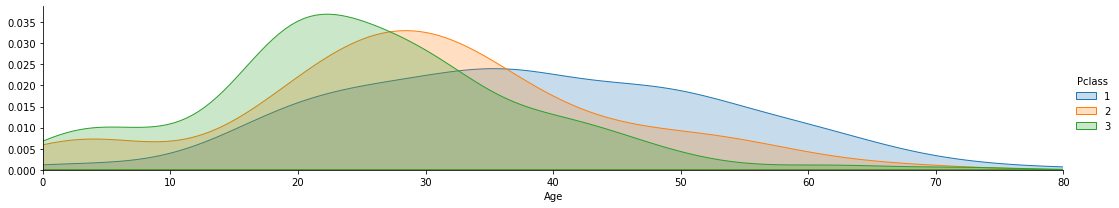

In [42]:
as_fig = sns.FacetGrid(data_train, hue = 'Pclass', aspect = 5)
as_fig.map(sns.kdeplot, 'Age', shade = True)
oldest = data_train['Age'].max()
as_fig.set(xlim = (0,oldest))
as_fig.add_legend()

Since I could, I figured I would investigate the different ports from which people embarked from and overwhemingly the majority of people embarked from the Southampton port.

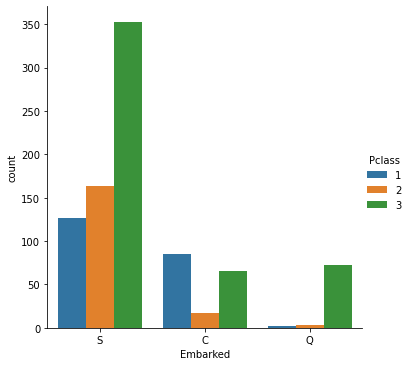

In [43]:
sns.catplot(x = 'Embarked', data = data_train, hue = 'Pclass', kind = 'count')

I also thought it would be interesting to investigate how many people were actually on the Titanic alone since we have two columns dedicated to giving us info on family members. I was surprised to find that the majority of passengers on board were alone. The error below, I believe didn't affect the plot nor the data incorrectly. Even though I looked into it, I couldn't quite understand how to avoid the copy of a slice error with my specific situation. In the second plot we see that it was about 50/50 whether first and second passengers were traveling alone but about twice as many third class passengers were traveling alone than third class passengers traveling with family.

C:\Users\wally\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


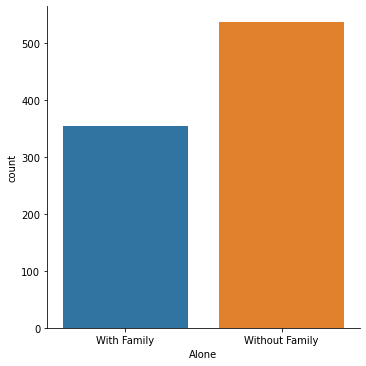

In [44]:
data_train['Alone'] = data_train.Parch + data_train.SibSp
data_train['Alone'].loc[data_train['Alone'] > 0] = 'With Family'
data_train['Alone'].loc[data_train['Alone'] == 0] = 'Without Family'
sns.catplot(x = 'Alone', kind = 'count', data = data_train)

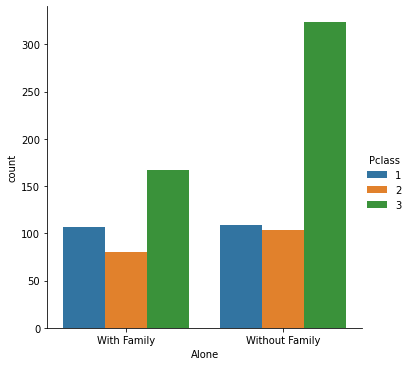

In [45]:
sns.catplot(x = 'Alone', kind = 'count', data = data_train, hue = 'Pclass')

Although a bit redundant, I wanted to add a couple more columns to get a different view of the data. I believe that 'Fare' and 'Pclass' are almost the same metric. I think it is safe to assume that if you paid more for a ticket, you had a higher class. This barplot reflects that. The more you paid for a ticket, the more likely you were to survive.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

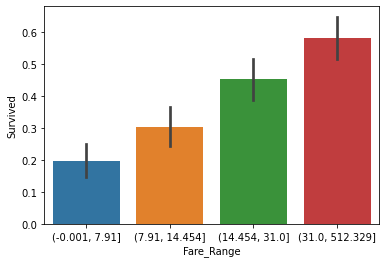

In [46]:
data_train['Fare_Range'] = pd.qcut(data_train['Fare'], 4)
sns.barplot(x = 'Fare_Range', y = 'Survived', data = data_train)

In my last visualization, I added another column which was age range. I plotted the different age bins with survival rate on the y axis. I found it strange that the lowest survival rate was people aged from 19-25 years old. Perhaps this was due to the fact that it was viewed they had the best physical chance of survival and thus shouldn't take a spot on life boats. I'll have to dig deeper next week to find out the answer to my questions. 

<AxesSubplot:xlabel='Age Range', ylabel='Survived'>

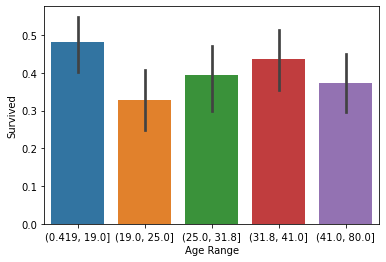

In [47]:
data_train['Age Range'] = pd.qcut(data_train['Age'], 5)
sns.barplot(x = 'Age Range', y = 'Survived', data = data_train)

## Finishing the Intro to Machine Learning Course on Kaggle

    I actually finished slightly earlier than the three hours quoted by Kaggle. The course explained a very basic approach to machine learning using a Random Tree Classifier and a Random Forest Classifier. The more useful and accurate of these two happens to be the Random Forest Classifier. This week I also started Kaggle's famous Titanic dataset challenge. In the Titanic Tutorial on Kaggle, the first thing you do is submit a prediction based on all passengers being female. You then have a quick intro to the Random Forest model and submit a second prediction by inputing the example code. This gives you enough information to get the curiosity flowing but not enough to really have any idea what you're actually doing. They suggest, taking a mini course, Intro to Machine Learning, on Kaggle which involves some exercises. This is good because I had no idea what nodes, the train_data, the test_data, bagging or leaves were. So after what I've learned this week, I'm going to explain what I've understood.

    It's normally helpful to learn something by using real world examples thereby linking what you don't know to something that you do know. So here is my real world example of a Random Forest Model. 

    Let's say you want to go on a vacation somewhere but you are not sure where to go. Naturally you would ask your friends for suggestions. These friends have no idea what you like so they ask you questions. Each friend represents a tree that will ask you for random input to make the best possible suggestion. Each friend has not talked to any of your other friends to decide which questions they should ask you. Each question they ask you creates a node. A node is basically a split in your (data), in this case the answers your friends are asking you questions for. For example, your friend asks you "Do you want to go somewhere with beaches?" This will naturally create two groups of places(data) in your friends mind of suggestions. Places with beaches and places without beaches. If you say yes to beaches, the friend will basically give no importance to places without beaches and will move on to thinking about places with beaches and then ask you a more specific question about places with beaches, which will create another node. For example, "Do you like places with nice beaches which also have a lot of people?"

    Now you must make another decision. You say yes, and now your friend focuses on places that have nice beaches and are busy and your are now creating a tree in your random forest. The more friends you ask, the more trees you will have and they will all naturally ask you different questions mixed with questions you have heard before and you are actually training yourself on what you like, comparing all of the suggestions of your friends to see the best ones. 
    In the scikit-learn library you have two functions: DecisionTreeRegressor and RandomForestClassifier that can build similar models. The basic difference between the two functions is that the former builds a single decision tree whereas the latter builds multiple trees. Using the example, if you really wanted to choose the best travel destination for yourself, what model would give you the most accurate choice; asking one friend or asking many friends? You would probably ask multiple friends which is why a Random Forest model is much more accurate. The process of "asking multiple friends" is bagging. Essentially if multiple trees are planted with replacement this randomizes the attributes and thus makes your data more reliable. Your friends are probably going to ask you some of the same questions because they don't communicate with each other. 
    Now what if you were interested in creating questions in general that could find out where anyone wanted to go? Now that you've had tens of hundreds of friends(let's imagine) ask you questions about where you want to go, it's reasonable to assume you have a pretty good idea of what categories (attributes) are important to you to make your decision (beaches, # of tourists, etc.) However would these same questions help other people make a decision on where they want to go? Maybe they don't care about beaches or the the number of tourists. Here's where the test data and the training data comes in. The training data is the information about the predictive attributes(beaches, tourists, etc.) where you train yourself to know what you like but how do you know it works outside your own preferences. The answer is, it probably doesn't. Maybe you represent the general public, maybe you don't. The goal of machine learning is to train a program to be predictive or "intuitive". So much like a person, it needs to be trained on something that simulates the real life situation that you want it to predict. So another function in the scikit-learn (from here on referred to as sklearn) library is the train_test_split function. Which splits your data into four subsets. (Variable names can be changed) train_X = subset of your independent variables that your model will be trained on. val_X = (test_X)(validation_X) subset of your independent variables that will be tested, train_y = a subset of your dependent variables that your model will be trained on. val_y = (test_y)(validation_y) subset of your dependent variables that will be tested. You train or fit your model on train_X and train_y and then get it to make a prediction on val_X using df.predict(). You compare the prediction you got from df.predict() and compare it with val_y. Using the mean_absolute_error function does this by essentially getting the absolute value of the difference between df.predict(X) and val_y. The result you get is how close on average your model predicted the actual outcomes of your dependent variables in the val_y subset.

    Now, you may be asking yourself, "Why is it necessary to have four subsets of data?" Using a real world example, say your are a math teacher of a class of 30 students. You teach them(train them on) linera algebra. Of course there's several assignments and even a pop quiz or two. You give them a final exam that looks exactly like their assignments and quizzes and they score very well. How good of an indicator do you think their scores are of their actual capabilities? This is why the data we train a machine on must differ somewhat to the data we test it on.

    I think that is enough of an explanation on random forest modeling. The other thing I was working on and what led me to random forest modeling is the Titanic dataset. This is THE dataset to do if you're an absolute beginner. It seems intimidating at first but there's so much documentation on it that it is becoming less and less scary. After importing the data, I did a few of the suggestions that Kaggle's platform suggested in addition to the visualizations I already created above. What I wanted to do right away was add Age to the list of independent variables for my Random Forest Classifier. I decided to replace the NaN values in the 'Age' column with the median value of 28. Adding 'Age' to my list of independent variables bumped up my score by 2% but I still haven't hit 80%. Considering I spent most of my time visualizing the data. I'll have to continue trying to submit better predictions this coming week. This was a long blog post but I really enjoyed analyzing this data. Thanks for reading guys! -Walter

In [48]:
median_age = data_train['Age'].median()
print(median_age)

28.0


In [49]:
data_train['Age'] = data_train['Age'].fillna(28.0)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  person       891 non-null    object  
 13  Alone        891 non-null    object  
 14  Fare_Range   891 non-null    category
 15  Age Range    714 non-null    category
dtypes: category(2), float64(2), int64(5), object(7)
memory usage: 99.8+ KB


In [50]:
data_test['Age'] = data_test['Age'].fillna(28.0)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [52]:
features = ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']
X = pd.get_dummies(data_train[features])
Y = data_train['Survived']
X_test = pd.get_dummies(data_test[features])
model = RandomForestClassifier(n_estimators = 100, max_depth= 5, random_state=1)
model.fit(X,Y)
predictions = model.predict(X_test)

output = pd.DataFrame({"PassengerId" : data_test.PassengerId, 'Survived' : predictions})
output.to_csv('titanic_submission.csv3', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
